# Physics 641 - Exam 1

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

### Problem 2: Heat Engines.

#### b) For each cycle (Otto and Carnot), make a plot of the cycle in:

#### • PV diagram

#### • Temperature vs Entropy diagram

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''Function to calculate the final pressure of an adiabat'''
def adiabatPV(Pi: float, Vi: float, Vf: float, gamma: float):
    Pf = Pi * (Vi / Vf)**gamma
    return Pf

'''Function to calculate the final temperature of an adiabat'''
def adiabatTV(Ti: float, Vi: float, Vf: float, gamma: float):
    Tf = Ti * (Vi / Vf)**(gamma - 1)
    return Tf

'''Function to calculate the final pressure of an isochor'''
def isochoricP(Pi: float, V: float, Q: float, f: int):
    Pf = Pi + (2 * Q) / (f * V)
    return Pf

'''Function to calculate the final entropy of an isochor'''
def isochoricS(Si: float, Ti: float, Tf: float, f: int):
    Sf = Si + (f * N * kB / 2) * np.log(Tf / Ti)
    return Sf

'''Function to calculate the final pressure of an isotherm'''
def isothermP(Pi: float, Vi: float, Vf: float):
    Pf = Pi * (Vi / Vf)
    return Pf

'''Function to calculate the final entropy of an isotherm'''
def isothermS(Si: float, Vi: float, Vf: float):
    Sf = Si + (N * kB) * np.log(Vf / Vi)
    return Sf

In [3]:
'''Given constants'''
N = 6.02 * 10**23    #number of particles
kB = 1.38 * 10**-23  #Boltzmann constant [J / K]
gamma = 7 / 5        #heat capacity ratio for diatomic molecule
f = 5                #degrees of freedom for diatomic molecule

'''Set colors'''
colors = plt.cm.viridis(np.linspace(0, 0.8, 5))

#### The Otto Cycle.

##### 5 → 1.  Intake stroke.  The mixture of gasoline and air is drawn into the tube through theintake valve by the movement of the piston. Idealization: A quasistatic isobaric intake of air at pressure P0 to a volume V1.

##### 1 → 2.  Compression stroke.  The intake valve closes and the air-fuel mixture is rapidly compressed in the tube.  The compression is nearly adiabatic and the temperature rises.  Idealization: A quasistatic adiabatic compression from V1 to V2; the temperature rises from T1 to T2.

##### 2 → 3.  Explosion.  The mixture explodes such that the volume remains unchanged and a very high temperature and pressure is reached.  Idealization: A quasistatic and constant volume increase of temperature and pressure due to the absorption of energy from a series of heat baths between T2 and T3

##### 3→ 4.  Power stroke.  The hot combustion products expand and do work on the piston.  The pressure and temperature decrease considerably.  Idealization: A quasistatic adiabatic expansion produces a decrease in temperature.

##### 4 → 1.  Valve exhaust.  At the end of the power stroke the exhaust valve opens and the com- bustion products are exhausted to the atmosphere.  There is a sudden decrease in pressure.  Idealization: A quasistatic constant volume decrease in temperature to T1 and pressure P0 due to an exchange of energy with a series of heat baths between T4 and T1.

##### 1 → 4.  Exhaust stroke.  The piston forces the remaining gases into the atmosphere.  The exhaust valve then closes and the intake valve opens for the next intake stroke. I dealization: A quasistatic isobaric expulsion of the air.

##### Pressure - Volume Diagram.

Point 1: P1 = 1.00E+05N/m^2, V1 = 0.008m^3, T1 = 96.30K
Point 2: P2 = 6.96E+05N/m^2, V2 = 0.002m^3, T2 = 167.66K
Point 3: P3 = 1.30E+06N/m^2, V3 = 0.002m^3, T3 = 312.11K
Point 4: P4 = 1.86E+05N/m^2, V4 = 0.008m^3, T3 = 179.26K


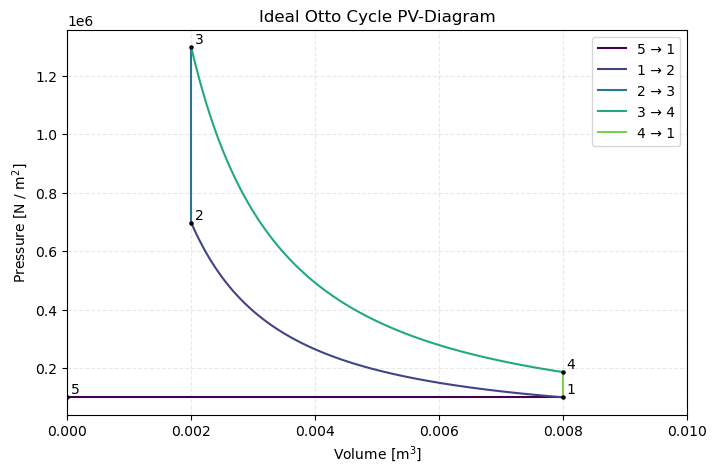

In [4]:
'''Set initial conditions'''
V1 = 0.008                 #volume at point 1 [m^3]
P1 = 10**5                 #pressure at point 1 [N / m^2]
T1 = (P1 * V1) / (N * kB)  #temperature at point 1 [K]
V2 = 0.002                 #volume at point 2 [m^3]
print(f'Point 1: P1 = {P1:.2E}N/m^2, V1 = {V1:.3f}m^3, T1 = {T1:.2f}K')

'''Intake stroke --> Isobaric expansion'''
V5 = 0
P5 = P1
V51_list = [V5, V1]
P51_list = [P5, P1]

'''Compression stroke --> Adiabatic compression'''
V12_list = np.linspace(V1, V2, 100)
P12_list = [adiabatPV(P1, V1, Vf, gamma) for Vf in V12_list]
P2 = P12_list[-1]
T2 = (P2 * V2) / (N * kB)
print(f'Point 2: P2 = {P2:.2E}N/m^2, V2 = {V2:.3f}m^3, T2 = {T2:.2f}K')

'''Explosion --> Isochoric heating'''
Qin = 3000  #energy from pure heating added [J]
V3 = V2
V23_list = [V2, V3]
P23_list = [P2, isochoricP(P2, V2, Qin, f)]
P3, Pmax = P23_list[-1], P23_list[-1]
T3, Tmax = (P3 * V3) / (N * kB), (P3 * V3) / (N * kB)
print(f'Point 3: P3 = {P3:.2E}N/m^2, V3 = {V3:.3f}m^3, T3 = {T3:.2f}K')

'''Power stroke --> Adiabatic expansion'''
V4 = V1
V34_list = np.linspace(V3, V4, 100)
P34_list = [adiabatPV(P3, V3, Vf, gamma) for Vf in V34_list]
P4 = P34_list[-1]
T4 = (P4 * V4) / (N * kB)
print(f'Point 4: P4 = {P4:.2E}N/m^2, V4 = {V4:.3f}m^3, T3 = {T4:.2f}K')

'''Valve exhaust --> Isochoric cooling'''
Qout = (P1 - P4) * (f / 2) * V4  #energy from pure cooling lost [J]
V41_list = [V4, V1]
P41_list = [P4, P1]

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.set_xlabel('Volume [m$^3$]')
ax.set_ylabel('Pressure [N / m$^2$]')
ax.set_title('Ideal Otto Cycle PV-Diagram')
ax.set_xlim([0, 0.01])
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(V51_list, P51_list, color = colors[0], label = '5 \u2192 1')
ax.plot(V12_list, P12_list, color = colors[1], label = '1 \u2192 2')
ax.plot(V23_list, P23_list, color = colors[2], label = '2 \u2192 3')
ax.plot(V34_list, P34_list, color = colors[3], label = '3 \u2192 4')
ax.plot(V41_list, P41_list, color = colors[4], label = '4 \u2192 1')
ax.scatter([V1, V2, V3, V4, 0], [P1, P2, P3, P4, P1], s = 5, c = 'black', zorder = 5)
for V, P, index in zip([V1, V2, V3, V4, 0], [P1, P2, P3, P4, P1], [1, 2, 3, 4, 5]):
    ax.annotate(f'{index}', xy = (V + 0.0002, P + 5 * 10**4), ha = 'right', va = 'top')
ax.legend(loc = 'upper right')

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/OttoCycle_pvDiagram.png')

##### Temperature - Entropy Diagram.

Point 1: T1 = 96.30K, S1 = 1.00J/K
Point 2: T2 = 167.66K, S2 = 1.00J/K
Point 3: T3 = 312.11K, S3 = 13.91J/K
Point 4: T4 = 179.26K, S4 = 13.91J/K


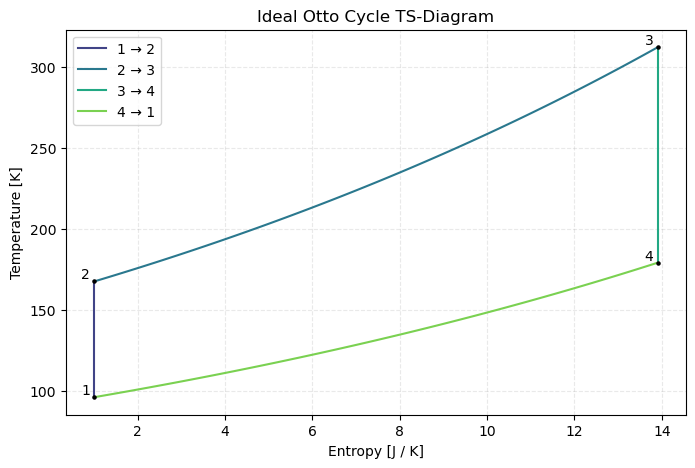

In [5]:
'''Set initial conditions'''
S1 = 1  #arbitrary entropy [J / K]
print(f'Point 1: T1 = {T1:.2f}K, S1 = {S1:.2f}J/K')

'''Compression stroke --> Adiabatic compression'''
S2 = S1
T12_list = [T1, T2]
S12_list = [S1, S2]
print(f'Point 2: T2 = {T2:.2f}K, S2 = {S2:.2f}J/K')

'''Explosion --> Isochoric heating'''
T23_list = np.linspace(T2, T3, 100)
S23_list = [isochoricS(S2, T2, Tf, f) for Tf in T23_list]
S3 = S23_list[-1]
print(f'Point 3: T3 = {T3:.2f}K, S3 = {S3:.2f}J/K')

'''Power stroke --> Adiabatic expansion'''
S4 = S3
T34_list = [T3, T4]
S34_list = [S3, S4]
print(f'Point 4: T4 = {T4:.2f}K, S4 = {S4:.2f}J/K')

'''Valve exhaust --> Isochoric cooling'''
T41_list = np.linspace(T4, T1, 100)
S41_list = [isochoricS(S4, T4, Tf, f) for Tf in T41_list]

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.set_xlabel('Entropy [J / K]')
ax.set_ylabel('Temperature [K]')
ax.set_title('Ideal Otto Cycle TS-Diagram')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(S12_list, T12_list, color = colors[1], label = '1 \u2192 2')
ax.plot(S23_list, T23_list, color = colors[2], label = '2 \u2192 3')
ax.plot(S34_list, T34_list, color = colors[3], label = '3 \u2192 4')
ax.plot(S41_list, T41_list, color = colors[4], label = '4 \u2192 1')
ax.scatter([S1, S2, S3, S4], [T1, T2, T3, T4], s = 5, c = 'black', zorder = 5)
for S, T, index in zip([S1, S2, S3, S4], [T1, T2, T3, T4], [1, 2, 3, 4]):
    ax.annotate(f'{index}', xy = (S - 0.3, T + 8.5), ha = 'left', va = 'top')
ax.legend(loc = 'upper left')

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/OttoCycle_tsDiagram.png')

#### The Carnot Cycle.

##### 1 → 2.  Isothermal expansion.  The system expands while it is in contact with the heat source.  During the expansion the high pressure gas pushes on the piston and the piston turns a crank.  This step is a power stroke of the engine and the engine does work. To keep the system at the same temperature, the engine must absorb energy from the heat source.

##### 2 → 3.  Adiabatic expansion.  We remove the thermal contact of the system with the hot bath and allow the volume to continue to increase so that the system expands adiabatically.  Both the pressure and the temperature of the system decrease. The step 2 → 3 is also a power stroke, but now we are cashing in on the energy stored in the system, because it can no longer take energy from the heat source.

##### 3→ 4.  Isothermal compression. We now begin to restore the system to its initial condition.  At 3 the system is placed in contact with the heat sink at temperature $T_{low}$ to ensure that the pressure remains low. Work is done on the system by pushing on the piston and compressing the system. As the system is compressed, the temperature of the system would rise, but the thermal contact with the heat sink ensures that the temperature remains at $T_{low}$.  The extra energy is dumped into the heat sink.

##### 4 → 1.  Adiabatic compression.  At 4 the volume is almost what it was initially, but the temperature of the system is too low. Before the piston returns to its initial state, we remove the contact with the heat sink and allow the work of adiabatic compression to increase the temperature of the system to $T_{high}$.

##### Pressure - Volume Diagram.

Point 1: P1 = 1.30E+06N/m^2, V1 = 0.002m^3, T1 = 312.11K
Point 2: P2 = 6.48E+05N/m^2, V2 = 0.004m^3, T2 = 312.11K
Point 3: P3 = 2.46E+05N/m^2, V3 = 0.008m^3, T3 = 236.53K
Point 4: P4 = 4.91E+05N/m^2, V4 = 0.004m^3, T3 = 236.53K


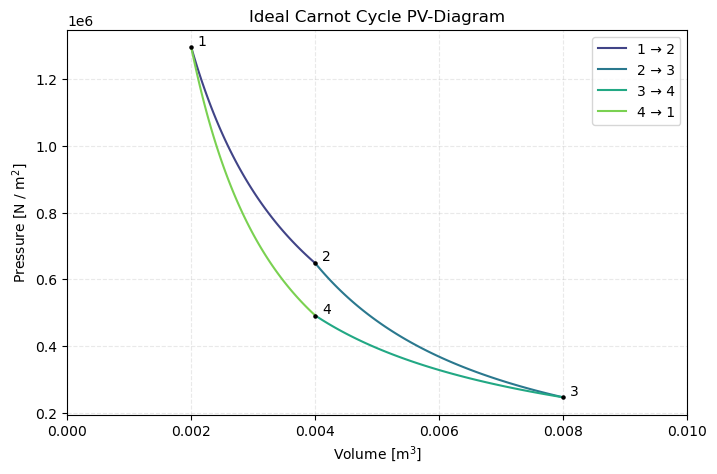

In [6]:
'''Set initial conditions'''
V1 = 0.002  #volume at point 1 [m^3]
P1 = Pmax   #pressure at point 1 [N / m^2]
T1 = Tmax   #temperature at point 1 [K]
print(f'Point 1: P1 = {P1:.2E}N/m^2, V1 = {V1:.3f}m^3, T1 = {T1:.2f}K')

'''Power stroke --> Isothermal expansion'''
V2 = 0.004
V12_list = np.linspace(V1, V2, 100)
P12_list = [isothermP(P1, V1, Vf) for Vf in V12_list]
P2 = P12_list[-1]
T2 = (P2 * V2) / (N * kB)
print(f'Point 2: P2 = {P2:.2E}N/m^2, V2 = {V2:.3f}m^3, T2 = {T2:.2f}K')

'''Power stroke --> Adiabatic expansion'''
V3 = 0.008
V23_list = np.linspace(V2, V3, 100)
P23_list = [adiabatPV(P2, V2, Vf, gamma) for Vf in V23_list]
P3 = P23_list[-1]
T3 = (P3 * V3) / (N * kB)
print(f'Point 3: P3 = {P3:.2E}N/m^2, V3 = {V3:.3f}m^3, T3 = {T3:.2f}K')

'''Thermal contact with heat sink --> Isothermal compression'''
V4 = 0.004
V34_list = np.linspace(V3, V4, 100)
P34_list = [isothermP(P3, V3, Vf) for Vf in V34_list]
P4 = P34_list[-1]
T4 = (P4 * V4) / (N * kB)
print(f'Point 4: P4 = {P4:.2E}N/m^2, V4 = {V4:.3f}m^3, T3 = {T4:.2f}K')

'''Remove thermal contact with heat sink --> Adiabatic compression'''
V41_list = np.linspace(V4, V1, 100)
P41_list = [adiabatPV(P4, V4, Vf, gamma) for Vf in V41_list]

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.set_xlabel('Volume [m$^3$]')
ax.set_ylabel('Pressure [N / m$^2$]')
ax.set_title('Ideal Carnot Cycle PV-Diagram')
ax.set_xlim([0, 0.01])
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(V12_list, P12_list, color = colors[1], label = '1 \u2192 2')
ax.plot(V23_list, P23_list, color = colors[2], label = '2 \u2192 3')
ax.plot(V34_list, P34_list, color = colors[3], label = '3 \u2192 4')
ax.plot(V41_list, P41_list, color = colors[4], label = '4 \u2192 1')
ax.scatter([V1, V2, V3, V4], [P1, P2, P3, P4], s = 5, c = 'black', zorder = 5)
for V, P, index in zip([V1, V2, V3, V4], [P1, P2, P3, P4], [1, 2, 3, 4]):
    ax.annotate(f'{index}', xy = (V + 0.00025, P + 4 * 10**4), ha = 'right', va = 'top')
ax.legend(loc = 'upper right')

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/CarnotCycle_pvDiagram.png')

##### Temperature - Entropy Diagram.

Point 1: T1 = 312.11K, S1 = 1.00J/K
Point 2: T2 = 312.11K, S2 = 6.76J/K
Point 3: T3 = 236.53K, S3 = 6.76J/K
Point 4: T4 = 236.53K, S4 = 1.00J/K


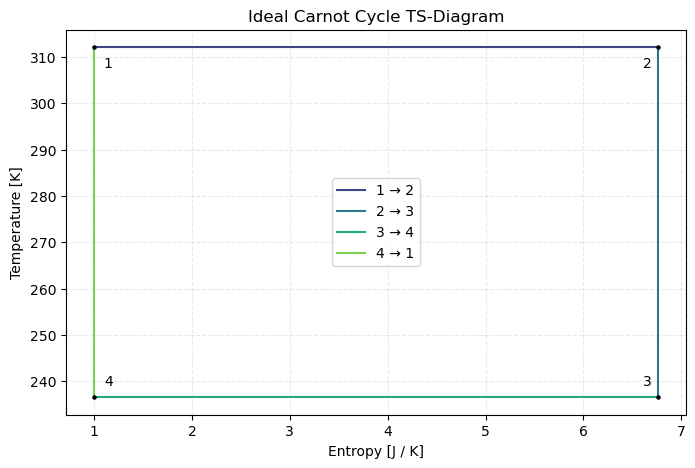

In [7]:
'''Set initial conditions'''
S1 = 1  #arbitrary entropy [J / K]
print(f'Point 1: T1 = {T1:.2f}K, S1 = {S1:.2f}J/K')

'''Power stroke --> Isothermal expansion'''
T12_list = [T1, T2]
S12_list = [S1, isothermS(S1, V1, V2)]
S2 = S12_list[-1]
print(f'Point 2: T2 = {T2:.2f}K, S2 = {S2:.2f}J/K')

'''Power stroke --> Adiabatic expansion'''
S3 = S2
T23_list = [T2, T3]
S23_list = [S2, S3]
T3 = (P3 * V3) / (N * kB)
print(f'Point 3: T3 = {T3:.2f}K, S3 = {S3:.2f}J/K')

'''Thermal contact with heat sink --> Isothermal compression'''
T34_list = [T3, T4]
S34_list = [S3, isothermS(S3, V3, V4)]
S4 = S34_list[-1]
print(f'Point 4: T4 = {T4:.2f}K, S4 = {S4:.2f}J/K')

'''Remove thermal contact with heat sink --> Adiabatic compression'''
T41_list = [T4, T1]
S41_list = [S4, S1]

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.set_xlabel('Entropy [J / K]')
ax.set_ylabel('Temperature [K]')
ax.set_title('Ideal Carnot Cycle TS-Diagram')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(S12_list, T12_list, color = colors[1], label = '1 \u2192 2')
ax.plot(S23_list, T23_list, color = colors[2], label = '2 \u2192 3')
ax.plot(S34_list, T34_list, color = colors[3], label = '3 \u2192 4')
ax.plot(S41_list, T41_list, color = colors[4], label = '4 \u2192 1')
ax.scatter([S1, S2, S3, S4], [T1, T2, T3, T4], s = 5, c = 'black', zorder = 5)
ax.annotate('1', xy = (S1 + 0.1, T1 - 2), ha = 'left', va = 'top')
ax.annotate('2', xy = (S2 - 0.15, T2 - 2), ha = 'left', va = 'top')
ax.annotate('3', xy = (S3 - 0.15, T3 + 5), ha = 'left', va = 'top')
ax.annotate('4', xy = (S4 + 0.1, T4 + 5), ha = 'left', va = 'top')
ax.legend(loc = 'center')

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/CarnotCycle_tsDiagram.png')